In [1]:
import numpy as np

def extract_dqdv_features(cell_data, n_cycles):
    """
    İlk n döngüdeki dQ/dV eğrilerinden özellikler çıkarır:
    - peak (yükseklik)
    - area (integral)
    - var (dQ/dV varyansı)  <-- YENİ
    """
    cycles = cell_data["cycles"]
    
    peaks = []
    areas = []
    variances = []       # <-- YENİ
    cycle_nums = []

    max_cycle = min(n_cycles, len(cycles))

    for i in range(max_cycle):
        key = str(i)
        if key not in cycles:
            continue

        dqdv = np.array(cycles[key]["dQdV"])
        if dqdv.size == 0:
            continue

        peak = float(np.max(dqdv))
        area = float(np.sum(dqdv))
        var  = float(np.var(dqdv))   # <-- ΔQ(V) varyansı

        peaks.append(peak)
        areas.append(area)
        variances.append(var)       # <-- YENİ
        cycle_nums.append(i)

    if len(peaks) < 2:
        return {
            "dqdv_peak_first": np.nan,
            "dqdv_peak_last": np.nan,
            "dqdv_peak_delta": np.nan,
            "dqdv_peak_mean": np.nan,
            "dqdv_peak_std": np.nan,
            "dqdv_peak_slope": np.nan,
            "dqdv_area_first": np.nan,
            "dqdv_area_last": np.nan,
            "dqdv_area_delta": np.nan,
            "dqdv_area_mean": np.nan,
            "dqdv_area_std": np.nan,
            "dqdv_area_slope": np.nan,
            # YENİ var feature'ları
            "dqdv_var_first": np.nan,
            "dqdv_var_last": np.nan,
            "dqdv_var_delta": np.nan,
            "dqdv_var_mean": np.nan,
            "dqdv_var_std": np.nan,
            "dqdv_var_slope": np.nan,
        }

    peaks = np.array(peaks)
    areas = np.array(areas)
    variances = np.array(variances)
    cycle_nums = np.array(cycle_nums, dtype=float)

    peak_slope, _ = np.polyfit(cycle_nums, peaks, 1)
    area_slope, _ = np.polyfit(cycle_nums, areas, 1)
    var_slope,  _ = np.polyfit(cycle_nums, variances, 1)  # <-- YENİ

    return {
        # PEAK
        "dqdv_peak_first": float(peaks[0]),
        "dqdv_peak_last": float(peaks[-1]),
        "dqdv_peak_delta": float(peaks[-1] - peaks[0]),
        "dqdv_peak_mean": float(np.mean(peaks)),
        "dqdv_peak_std": float(np.std(peaks)),
        "dqdv_peak_slope": float(peak_slope),

        # AREA
        "dqdv_area_first": float(areas[0]),
        "dqdv_area_last": float(areas[-1]),
        "dqdv_area_delta": float(areas[-1] - areas[0]),
        "dqdv_area_mean": float(np.mean(areas)),
        "dqdv_area_std": float(np.std(areas)),
        "dqdv_area_slope": float(area_slope),

        # VARIANCE  <-- YENİ BLOK
        "dqdv_var_first": float(variances[0]),
        "dqdv_var_last": float(variances[-1]),
        "dqdv_var_delta": float(variances[-1] - variances[0]),
        "dqdv_var_mean": float(np.mean(variances)),
        "dqdv_var_std": float(np.std(variances)),
        "dqdv_var_slope": float(var_slope),
    }

def extract_capacity_fade_features(cell_data, n_cycles):
    """
    İlk n döngüdeki discharge capacity (Qd) değerlerinden
    kapasite düşüş eğimi (slope) ve intercept çıkarır.
    """
    cycles = cell_data["cycles"]

    Qd_values = []
    cycle_nums = []

    max_cycle = min(n_cycles, len(cycles))

    for i in range(max_cycle):
        key = str(i)
        if key not in cycles:
            continue
        
        Qd = np.array(cycles[key]["Qd"])
        if Qd.size == 0:
            continue
        
        Qd_mean = np.mean(Qd)
        Qd_values.append(Qd_mean)
        cycle_nums.append(i)

    if len(Qd_values) < 2:
        return {
            "Qd_slope": np.nan,
            "Qd_intercept": np.nan,
            "Qd_first": np.nan,
            "Qd_last": np.nan,
            "Qd_delta": np.nan,
        }

    cycle_nums = np.array(cycle_nums, dtype=float)
    Qd_values = np.array(Qd_values, dtype=float)

    slope, intercept = np.polyfit(cycle_nums, Qd_values, 1)

    return {
        "Qd_slope": float(slope),
        "Qd_intercept": float(intercept),
        "Qd_first": float(Qd_values[0]),
        "Qd_last": float(Qd_values[-1]),
        "Qd_delta": float(Qd_values[-1] - Qd_values[0]),
    }



In [2]:
def extract_capacity_fade_features(cell_data, n_cycles):
    """
    İlk n döngüdeki discharge capacity (Qd) değerlerinden
    kapasite düşüş eğimi (slope) ve intercept çıkarır.
    """
    cycles = cell_data["cycles"]

    Qd_values = []
    cycle_nums = []

    max_cycle = min(n_cycles, len(cycles))

    for i in range(max_cycle):
        key = str(i)
        if key not in cycles:
            continue
        
        Qd = np.array(cycles[key]["Qd"])
        if Qd.size == 0:
            continue
        
        Qd_mean = np.mean(Qd)
        Qd_values.append(Qd_mean)
        cycle_nums.append(i)

    if len(Qd_values) < 2:
        return {
            "Qd_slope": np.nan,
            "Qd_intercept": np.nan,
            "Qd_first": np.nan,
            "Qd_last": np.nan,
            "Qd_delta": np.nan,
        }

    cycle_nums = np.array(cycle_nums, dtype=float)
    Qd_values = np.array(Qd_values, dtype=float)

    slope, intercept = np.polyfit(cycle_nums, Qd_values, 1)

    return {
        "Qd_slope": float(slope),
        "Qd_intercept": float(intercept),
        "Qd_first": float(Qd_values[0]),
        "Qd_last": float(Qd_values[-1]),
        "Qd_delta": float(Qd_values[-1] - Qd_values[0]),
    }


In [4]:
# ============================================================
# ExtractDQdVFeatures.ipynb
# Amaç: batch1.pkl -> özellik çıkarımı -> features_early_cycles.csv
# ============================================================

import pickle
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# 1) Veriyi yükle: batch1.pkl
# ------------------------------------------------------------
with open("../batch1.pkl", "rb") as fp:
    bat_dict = pickle.load(fp)

print("Toplam hücre sayısı:", len(bat_dict))  # örn: 124 gibi bir şey

# ------------------------------------------------------------
# 2) Yardımcı fonksiyonlar
# ------------------------------------------------------------

def extract_summary_features(cell_data, n_cycles):
    """
    İlk n döngü için özet özellikler çıkarır:
    - Qd_mean, Qd_std: Deşarj kapasitesi istatistikleri
    - IR_mean, IR_std: İç direnç istatistikleri
    - Tavg_mean: Ortalama sıcaklık
    - dQd_slope: Qd (kapasite) vs cycle lineer eğimi
    """
    summary = cell_data["summary"]
    
    # summary içindeki dizileri alalım
    # Burada veri yapısına göre ufak uyarlama gerekebilir,
    # ama tipik Severson datasında 1D array'ler olur.
    Qd = np.array(summary["QD"])       # deşarj kapasitesi
    IR = np.array(summary["IR"])       # iç direnç
    Tavg = np.array(summary["Tavg"])   # ortalama sıcaklık
    cycles = np.array(summary["cycle"])  # cycle index
    
    # İlk n döngüyü al (veri daha azsa onu kullan)
    max_idx = min(n_cycles, len(Qd))
    Qd_n = Qd[:max_idx]
    IR_n = IR[:max_idx]
    Tavg_n = Tavg[:max_idx]
    cycles_n = cycles[:max_idx]

    # Ortalama ve std
    Qd_mean = float(np.mean(Qd_n))
    Qd_std = float(np.std(Qd_n))

    IR_mean = float(np.mean(IR_n))
    IR_std = float(np.std(IR_n))

    Tavg_mean = float(np.mean(Tavg_n))

    # Qd vs cycle lineer eğimi (degradasyon trendi)
    if len(cycles_n) > 1:
        slope, _ = np.polyfit(cycles_n, Qd_n, 1)
        dQd_slope = float(slope)
    else:
        dQd_slope = np.nan

    return {
        "Qd_mean": Qd_mean,
        "Qd_std": Qd_std,
        "IR_mean": IR_mean,
        "IR_std": IR_std,
        "Tavg_mean": Tavg_mean,
        "dQd_slope": dQd_slope,
    }


def extract_dqdv_features(cell_data, n_cycles):
    """
    İlk n döngüdeki dQ/dV eğrisinden özellikler çıkarır.
    Kullanılan özellikler:
    - dqdv_peak_* : dQ/dV peak istatistikleri
    - dqdv_area_* : dQ/dV eğrisi alanı istatistikleri
    """
    cycles = cell_data["cycles"]
    
    peaks = []
    areas = []
    cycle_nums = []

    max_cycle = min(n_cycles, len(cycles))

    for i in range(max_cycle):
        key = str(i)
        if key in cycles:
            dqdv = np.array(cycles[key]["dQdV"])
            if dqdv.size == 0:
                continue

            peak = float(np.max(dqdv))
            area = float(np.sum(dqdv))

            peaks.append(peak)
            areas.append(area)
            cycle_nums.append(i)

    # Yeterli veri yoksa NaN dön
    if len(peaks) < 2:
        return {
            "dqdv_peak_first": np.nan,
            "dqdv_peak_last": np.nan,
            "dqdv_peak_delta": np.nan,
            "dqdv_peak_mean": np.nan,
            "dqdv_peak_std": np.nan,
            "dqdv_peak_slope": np.nan,
            "dqdv_area_first": np.nan,
            "dqdv_area_last": np.nan,
            "dqdv_area_delta": np.nan,
            "dqdv_area_mean": np.nan,
            "dqdv_area_std": np.nan,
            "dqdv_area_slope": np.nan,
        }

    peaks = np.array(peaks)
    areas = np.array(areas)
    cycle_nums = np.array(cycle_nums, dtype=float)

    # Trend (slope) hesapla
    peak_slope, _ = np.polyfit(cycle_nums, peaks, 1)
    area_slope, _ = np.polyfit(cycle_nums, areas, 1)

    return {
        "dqdv_peak_first": float(peaks[0]),
        "dqdv_peak_last": float(peaks[-1]),
        "dqdv_peak_delta": float(peaks[-1] - peaks[0]),
        "dqdv_peak_mean": float(np.mean(peaks)),
        "dqdv_peak_std": float(np.std(peaks)),
        "dqdv_peak_slope": float(peak_slope),

        "dqdv_area_first": float(areas[0]),
        "dqdv_area_last": float(areas[-1]),
        "dqdv_area_delta": float(areas[-1] - areas[0]),
        "dqdv_area_mean": float(np.mean(areas)),
        "dqdv_area_std": float(np.std(areas)),
        "dqdv_area_slope": float(area_slope),
    }

# ------------------------------------------------------------
# 3) Tüm hücreler için özellikleri çıkar
# ------------------------------------------------------------

rows = []

for cell_id, cell_data in bat_dict.items():
    cycle_life = float(cell_data["cycle_life"])  # hedef ömür

    for n_cycles in [25, 50, 100]:
        summary_feats = extract_summary_features(cell_data, n_cycles)
        dqdv_feats = extract_dqdv_features(cell_data, n_cycles)

        row = {
            "cell_id": cell_id,
            "n_cycles": n_cycles,
            "cycle_life": cycle_life,
        }
        row.update(summary_feats)
        row.update(dqdv_feats)

        rows.append(row)

df_features = pd.DataFrame(rows)
print(df_features.head())

# ------------------------------------------------------------
# 4) Temizle ve CSV olarak kaydet
# ------------------------------------------------------------

# cycle_life ve feature kolonlarını numerik hale getir, NaN olan satırları at
all_feature_cols = [c for c in df_features.columns if c not in ["cell_id", "n_cycles"]]

df_features["cycle_life"] = (
    df_features["cycle_life"]
    .astype(str)
    .str.strip()
    .str.replace(r"[\[\]]", "", regex=True)
)
df_features["cycle_life"] = pd.to_numeric(df_features["cycle_life"], errors="coerce")

for col in all_feature_cols:
    if col == "cycle_life":
        continue
    df_features[col] = pd.to_numeric(df_features[col], errors="coerce")

print("NaN içeren satır sayısı:", df_features.isna().any(axis=1).sum())
df_features = df_features.dropna()

print("Temizlik sonrası satır sayısı:", len(df_features))

# CSV'ye kaydet
df_features.to_csv("features_early_cycles.csv", index=False)
print("✔ features_early_cycles.csv oluşturuldu.")


Toplam hücre sayısı: 47


C:\Users\dicle\AppData\Local\Temp\ipykernel_6640\1784788143.py:150: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cycle_life = float(cell_data["cycle_life"])  # hedef ömür


  cell_id  n_cycles  cycle_life   Qd_mean    Qd_std   IR_mean    IR_std  \
0    b1c0        25       477.0  1.104835  0.001730  0.017266  0.000128   
1    b1c0        50       477.0  1.105175  0.002964  0.017289  0.000118   
2    b1c0       100       477.0  1.105038  0.003119  0.017338  0.000122   
3    b1c1        25       491.0  1.107000  0.001108  0.017764  0.000211   
4    b1c1        50       491.0  1.106932  0.001209  0.017645  0.000195   

   Tavg_mean  dQd_slope  dqdv_peak_first  ...  dqdv_peak_delta  \
0  31.822145   0.000161              0.0  ...              0.0   
1  31.804072   0.000022              0.0  ...              0.0   
2  31.807497   0.000016              0.0  ...              0.0   
3  33.542142   0.000030              0.0  ...              0.0   
4  33.605174   0.000016              0.0  ...              0.0   

   dqdv_peak_mean  dqdv_peak_std  dqdv_peak_slope  dqdv_area_first  \
0       -0.000554       0.002055     2.424354e-05      -772.439850   
1       -0.0

Seçilen hücre: b1c0


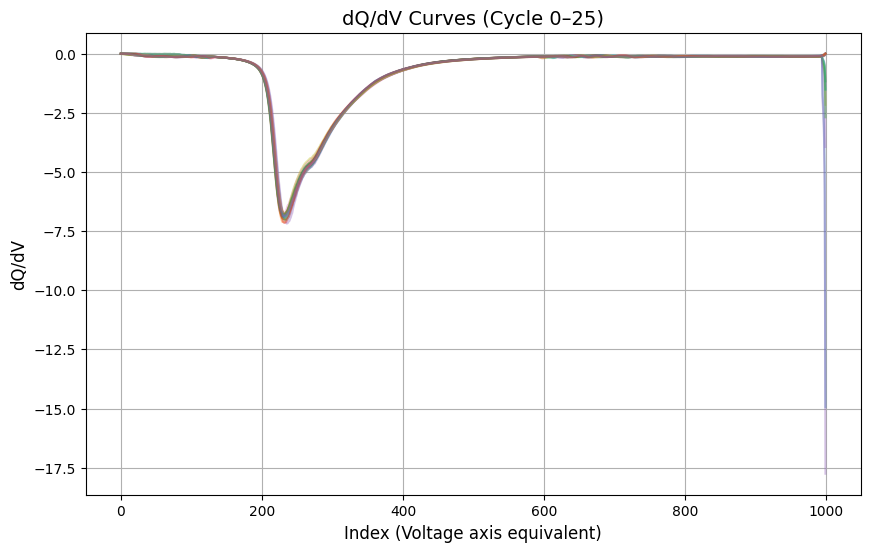

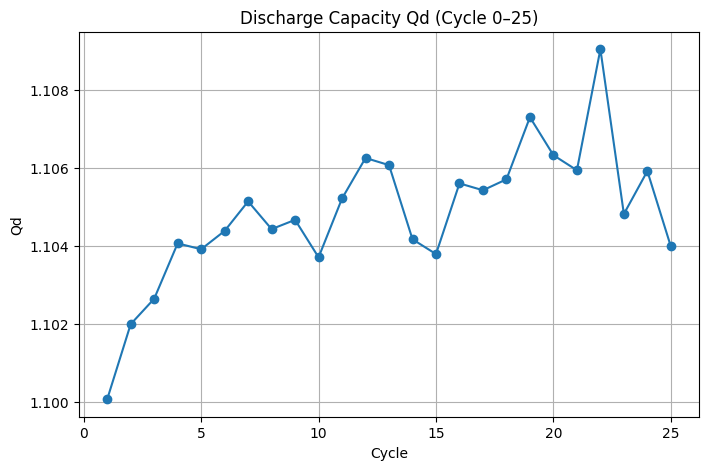

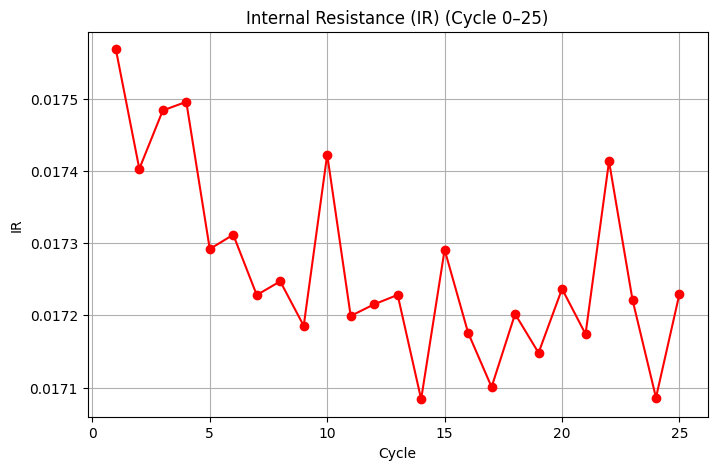

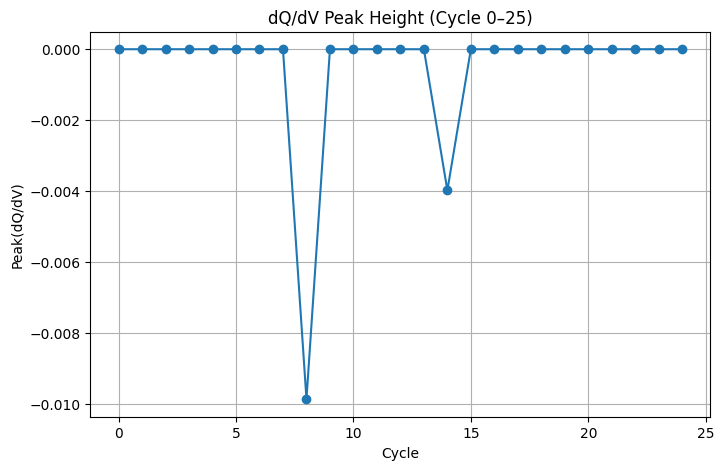

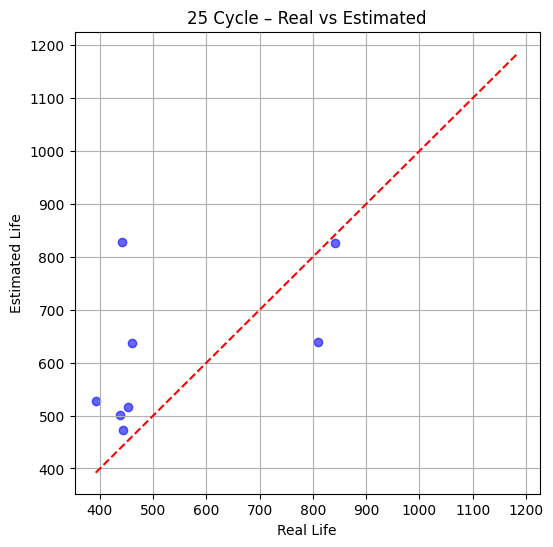

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# -------------------------------
# 1) batch1.pkl dosyasını yükle
# -------------------------------
with open("../batch1.pkl", "rb") as fp:
    bat_dict = pickle.load(fp)

# İncelemek için bir örnek hücre seçelim
sample_cell_id = list(bat_dict.keys())[0]
cell = bat_dict[sample_cell_id]
print("Seçilen hücre:", sample_cell_id)

# -------------------------------
# 2) dQ/dV curve plot (cycle 0–25)
# -------------------------------
plt.figure(figsize=(10,6))

for i in range(0, 25):
    key = str(i)
    if key in cell["cycles"]:
        dqdv = np.array(cell["cycles"][key]["dQdV"])
        if len(dqdv) > 0:
            plt.plot(dqdv, alpha=0.4)

plt.title("dQ/dV Curves (Cycle 0–25)", fontsize=14)
plt.xlabel("Index (Voltage axis equivalent)", fontsize=12)
plt.ylabel("dQ/dV", fontsize=12)
plt.grid(True)
plt.show()

# -------------------------------
# 3) Qd vs Cycle plot
# -------------------------------
summary = cell["summary"]
Qd = np.array(summary["QD"])
cycles = np.array(summary["cycle"])

plt.figure(figsize=(8,5))
plt.plot(cycles[:25], Qd[:25], marker='o')
plt.title("Discharge Capacity Qd (Cycle 0–25)")
plt.xlabel("Cycle")
plt.ylabel("Qd")
plt.grid(True)
plt.show()

# -------------------------------
# 4) IR vs Cycle
# -------------------------------
IR = np.array(summary["IR"])

plt.figure(figsize=(8,5))
plt.plot(cycles[:25], IR[:25], marker='o', color="red")
plt.title("Internal Resistance (IR) (Cycle 0–25)")
plt.xlabel("Cycle")
plt.ylabel("IR")
plt.grid(True)
plt.show()

# -------------------------------
# 5) dQ/dV peak height vs cycle
# -------------------------------
peaks = []
for i in range(25):
    key = str(i)
    if key in cell["cycles"]:
        dqdv = np.array(cell["cycles"][key]["dQdV"])
        if len(dqdv) > 0:
            peaks.append(np.max(dqdv))
        else:
            peaks.append(np.nan)

plt.figure(figsize=(8,5))
plt.plot(range(25), peaks, marker='o')
plt.title("dQ/dV Peak Height (Cycle 0–25)")
plt.xlabel("Cycle")
plt.ylabel("Peak(dQ/dV)")
plt.grid(True)
plt.show()

# -------------------------------
# 6) Real vs Predicted scatter (25 cycle)
# -------------------------------

# 25 cycle subset'ini al
df = pd.read_csv("features_early_cycles.csv")

df_25 = df[df["n_cycles"] == 25].dropna()

# Özellik kolonları (senin kullandığın liste)
feature_cols = [
    "Qd_mean", "Qd_std", "IR_mean", "IR_std", "Tavg_mean", "dQd_slope",
    "dqdv_peak_first", "dqdv_peak_last", "dqdv_peak_delta",
    "dqdv_peak_mean", "dqdv_peak_std", "dqdv_peak_slope",
    "dqdv_area_first", "dqdv_area_last", "dqdv_area_delta",
    "dqdv_area_mean", "dqdv_area_std", "dqdv_area_slope",
]

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

X = df_25[feature_cols]
y = df_25["cycle_life"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.01,
    max_depth=2,
    subsample=0.95,
    colsample_bytree=0.95,
    reg_lambda=6.0,
    reg_alpha=5.0,
    min_child_weight=5,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6)
plt.xlabel("Real Life")
plt.ylabel("Estimated Life")
plt.title("25 Cycle – Real vs Estimated")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # y=x çizgisi
plt.show()


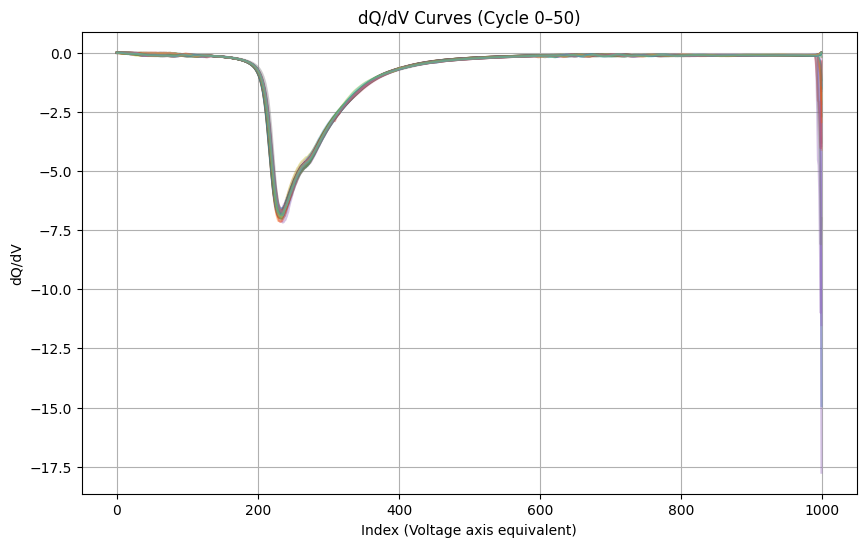

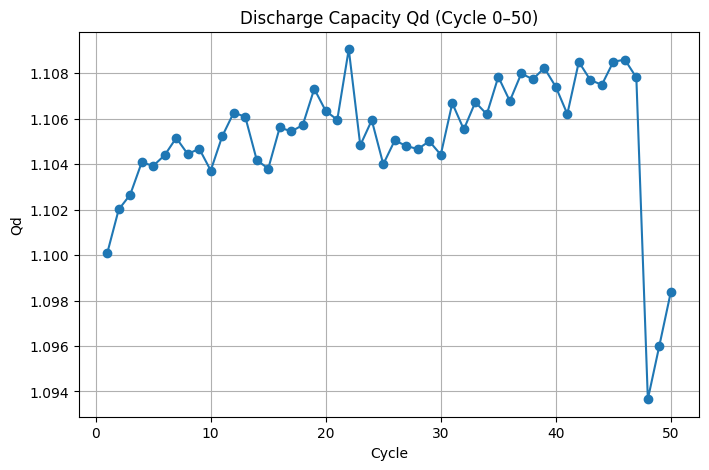

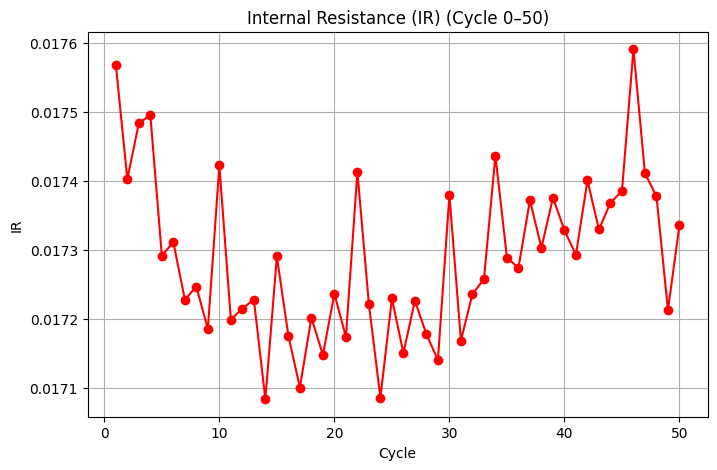

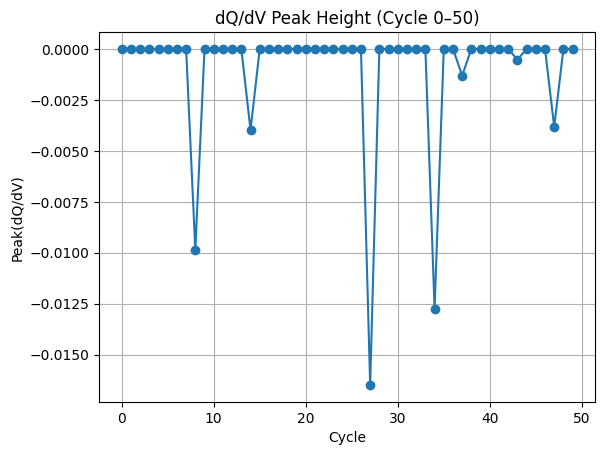

In [11]:
# =============================
# 25–50 Döngü Analiz Grafikleri
# =============================

start_c = 0
end_c = 50

plt.figure(figsize=(10,6))
for i in range(start_c, end_c):
    key = str(i)
    if key in cell["cycles"]:
        dqdv = np.array(cell["cycles"][key]["dQdV"])
        if len(dqdv) > 0:
            plt.plot(dqdv, alpha=0.4)
plt.title("dQ/dV Curves (Cycle 0–50)")
plt.xlabel("Index (Voltage axis equivalent)")
plt.ylabel("dQ/dV")
plt.grid(True)
plt.show()

# Qd vs cycle
plt.figure(figsize=(8,5))
plt.plot(cycles[start_c:end_c], Qd[start_c:end_c], marker='o')
plt.title("Discharge Capacity Qd (Cycle 0–50)")
plt.xlabel("Cycle")
plt.ylabel("Qd")
plt.grid(True)
plt.show()

# IR vs cycle
plt.figure(figsize=(8,5))
plt.plot(cycles[start_c:end_c], IR[start_c:end_c], marker='o', color="red")
plt.title("Internal Resistance (IR) (Cycle 0–50)")
plt.xlabel("Cycle")
plt.ylabel("IR")
plt.grid(True)
plt.show()

# dQ/dV peak height
peaks_25_50 = []
for i in range(start_c, end_c):
    key = str(i)
    if key in cell["cycles"]:
        dqdv = np.array(cell["cycles"][key]["dQdV"])
        if len(dqdv) > 0:
            peaks_25_50.append(np.max(dqdv))
        else:
            peaks_25_50.append(np.nan)

plt.plot(range(start_c, end_c), peaks_25_50, marker='o')
plt.title("dQ/dV Peak Height (Cycle 0–50)")
plt.xlabel("Cycle")
plt.ylabel("Peak(dQ/dV)")
plt.grid(True)
plt.show()


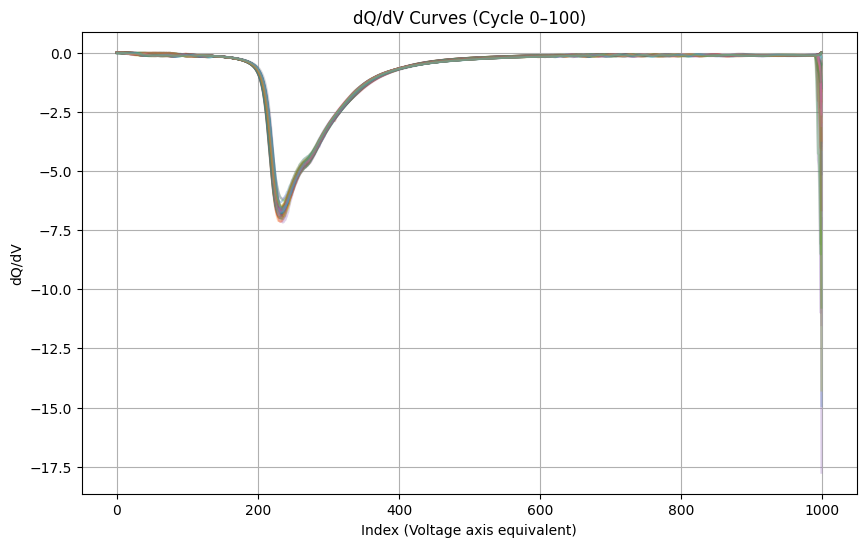

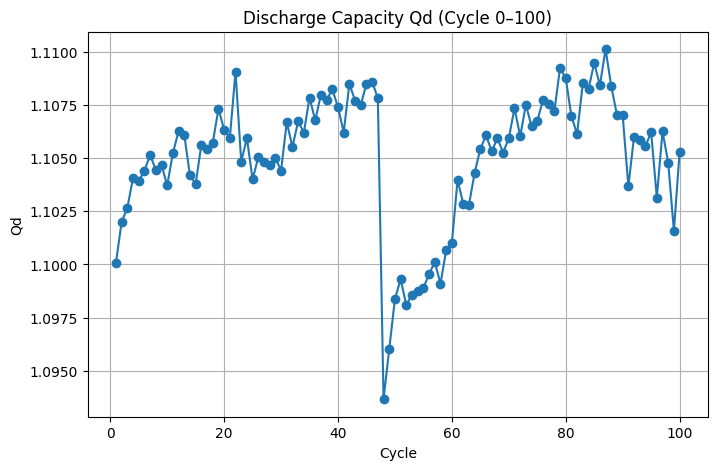

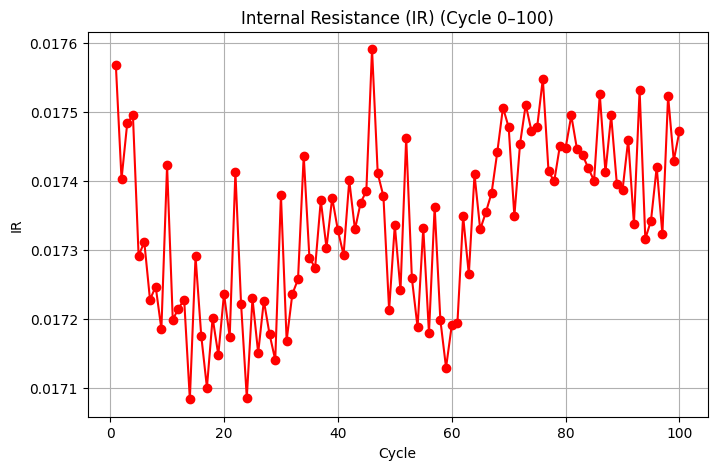

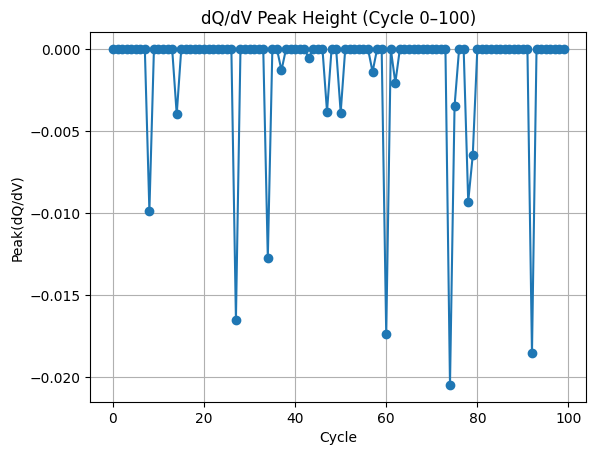

In [10]:
# =============================
# 50–100 Döngü Analiz Grafikleri
# =============================

start_c = 0
end_c = 100

plt.figure(figsize=(10,6))
for i in range(start_c, end_c):
    key = str(i)
    if key in cell["cycles"]:
        dqdv = np.array(cell["cycles"][key]["dQdV"])
        if len(dqdv) > 0:
            plt.plot(dqdv, alpha=0.3)
plt.title("dQ/dV Curves (Cycle 0–100)")
plt.xlabel("Index (Voltage axis equivalent)")
plt.ylabel("dQ/dV")
plt.grid(True)
plt.show()

# Qd vs cycle
plt.figure(figsize=(8,5))
plt.plot(cycles[start_c:end_c], Qd[start_c:end_c], marker='o')
plt.title("Discharge Capacity Qd (Cycle 0–100)")
plt.xlabel("Cycle")
plt.ylabel("Qd")
plt.grid(True)
plt.show()

# IR vs cycle
plt.figure(figsize=(8,5))
plt.plot(cycles[start_c:end_c], IR[start_c:end_c], marker='o', color="red")
plt.title("Internal Resistance (IR) (Cycle 0–100)")
plt.xlabel("Cycle")
plt.ylabel("IR")
plt.grid(True)
plt.show()

# dQ/dV peak height
peaks_50_100 = []
for i in range(start_c, end_c):
    key = str(i)
    if key in cell["cycles"]:
        dqdv = np.array(cell["cycles"][key]["dQdV"])
        if len(dqdv) > 0:
            peaks_50_100.append(np.max(dqdv))
        else:
            peaks_50_100.append(np.nan)

plt.plot(range(start_c, end_c), peaks_50_100, marker='o')
plt.title("dQ/dV Peak Height (Cycle 0–100)")
plt.xlabel("Cycle")
plt.ylabel("Peak(dQ/dV)")
plt.grid(True)
plt.show()


Toplam hücre sayısı: 47
Hücre ID'leri: ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c8', 'b1c9'] ...
Seçilen hücre: b1c0

=== 0–25 Döngü Aralığı Grafikler ===


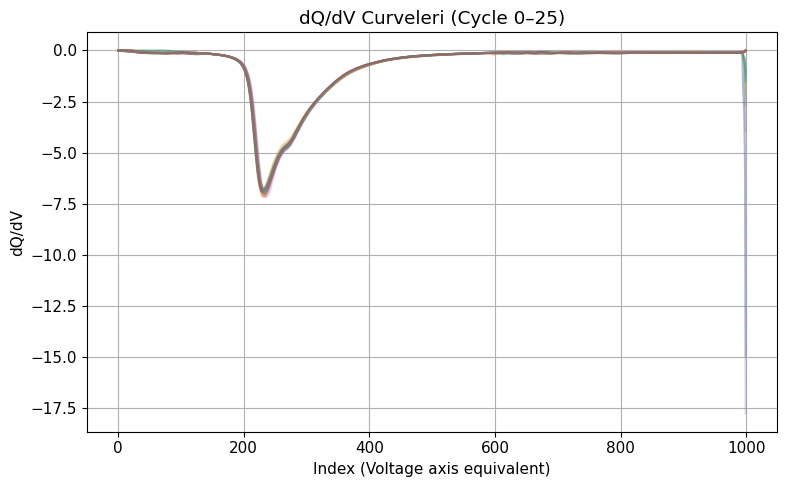

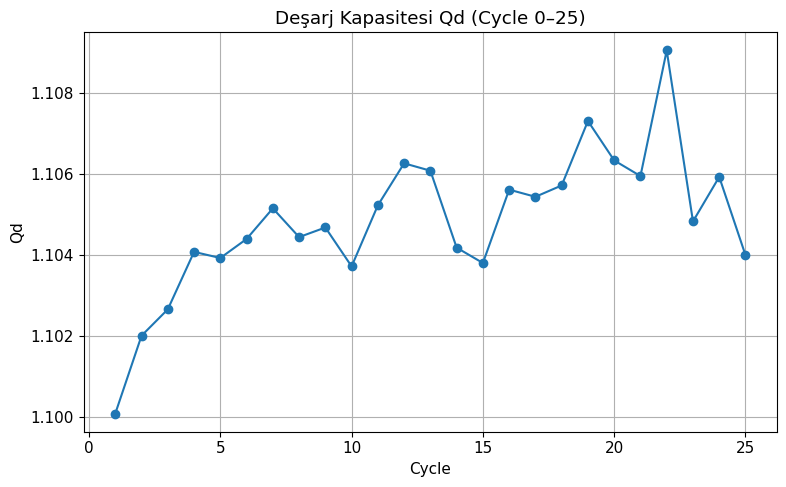

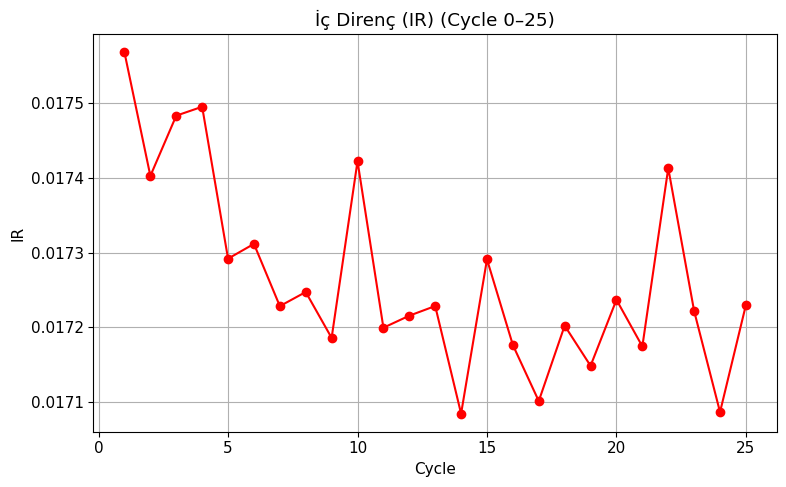

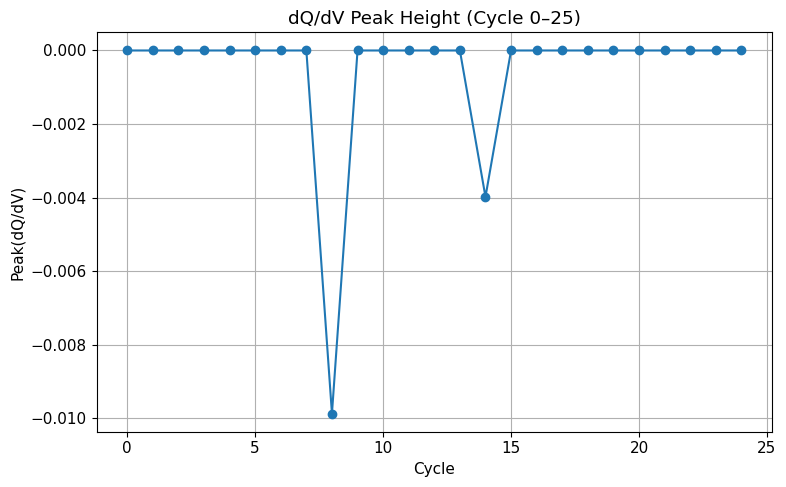


=== 25–50 Döngü Aralığı Grafikler ===


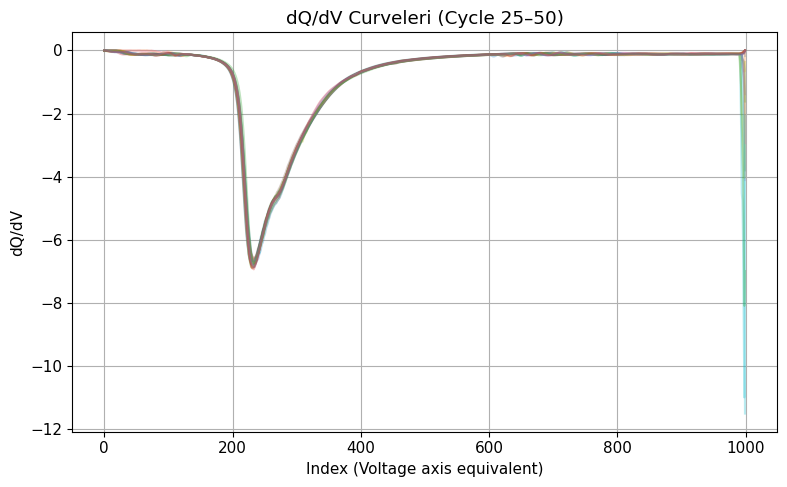

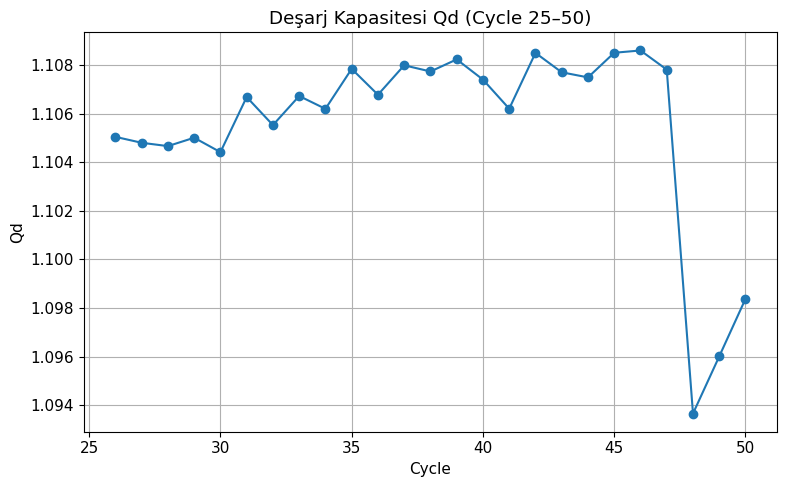

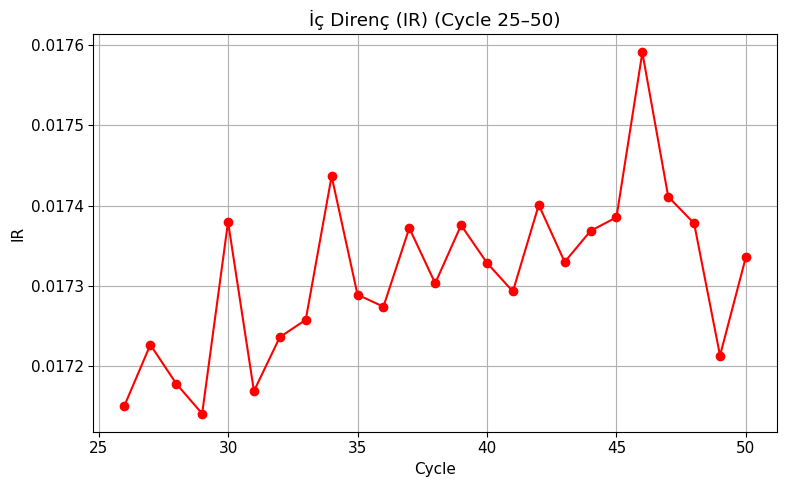

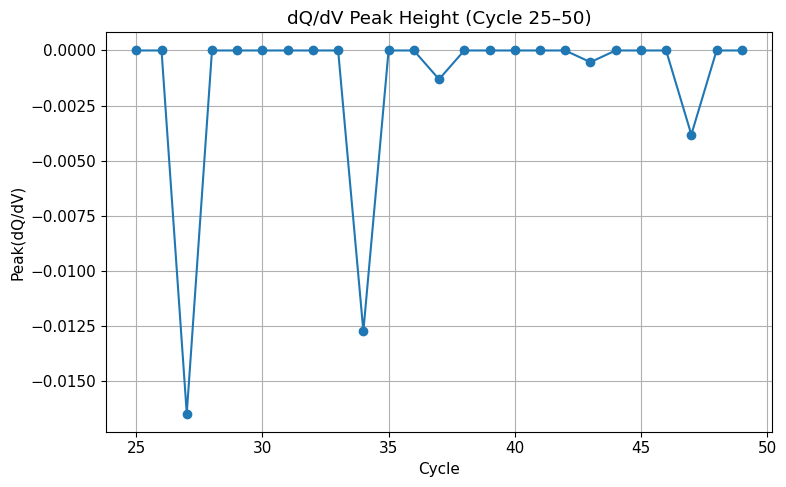


=== 50–100 Döngü Aralığı Grafikler ===


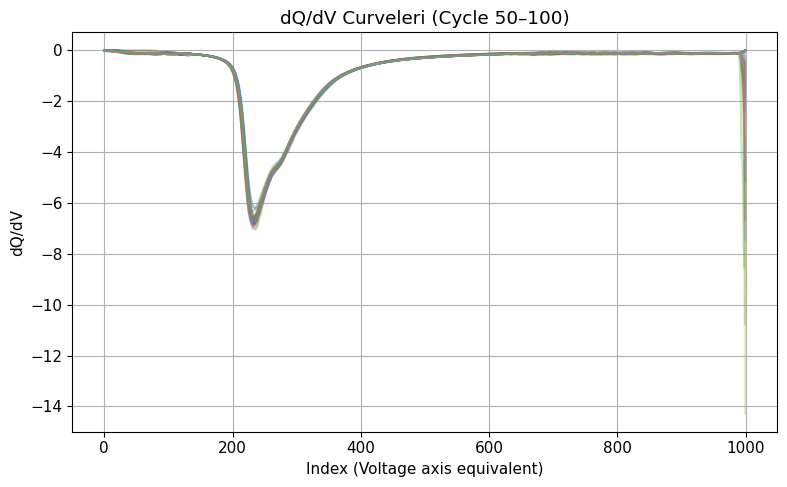

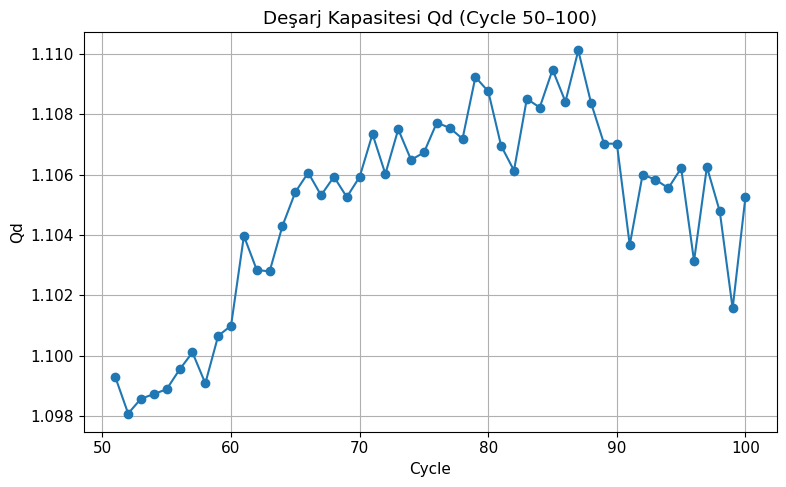

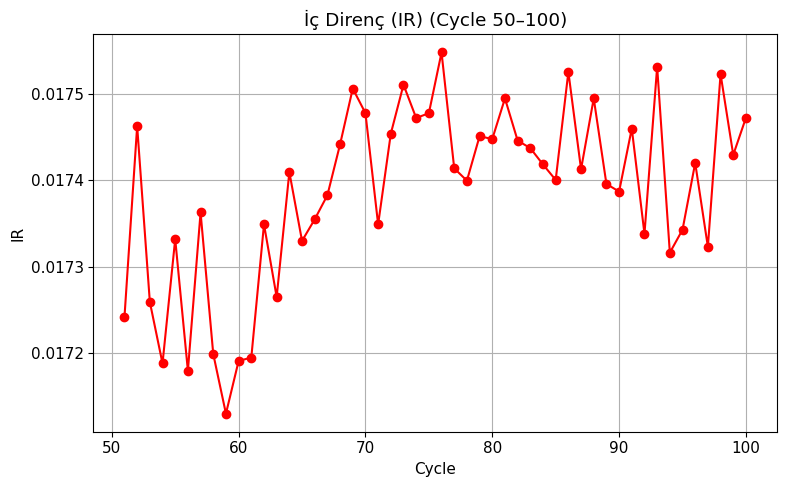

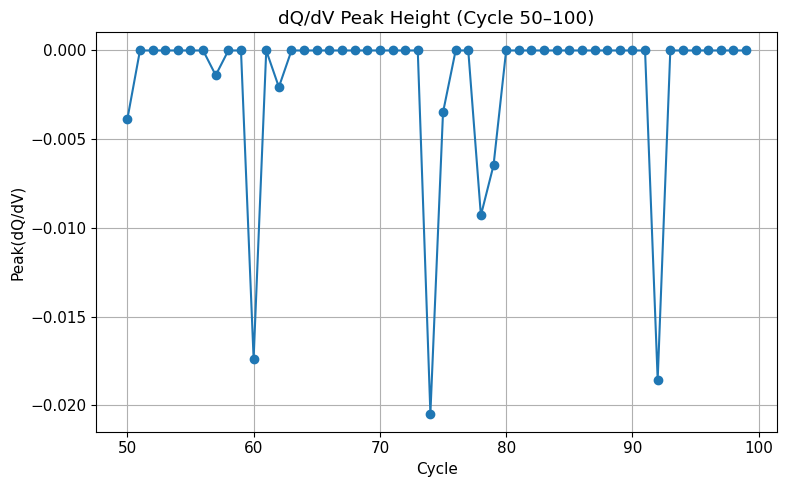

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Daha büyük ve okunaklı grafikler için
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["font.size"] = 11

# --------------------------------------------------
# 1) batch1.pkl dosyasını yükle
# --------------------------------------------------
with open("batch1.pkl", "rb") as fp:
    bat_dict = pickle.load(fp)

print("Toplam hücre sayısı:", len(bat_dict))
print("Hücre ID'leri:", list(bat_dict.keys())[:10], "...")

# Örnek olarak ilk hücreyi seçelim (istersen ID'yi değiştirebilirsin)
sample_cell_id = list(bat_dict.keys())[0]
cell = bat_dict[sample_cell_id]
print("Seçilen hücre:", sample_cell_id)

# Summary bilgileri
summary = cell["summary"]
Qd = np.array(summary["QD"])
IR = np.array(summary["IR"])
cycles = np.array(summary["cycle"])

# --------------------------------------------------
# 2) Yardımcı fonksiyon: Belirli cycle aralığı için
#    4 grafik birden çiz (dQdV, Qd, IR, Peak)
# --------------------------------------------------
def plot_range(start_c, end_c, cell, cycles, Qd, IR):
    title_suffix = f"Cycle {start_c}–{end_c}"

    # 2.1 dQ/dV eğrileri
    plt.figure()
    for i in range(start_c, end_c):
        key = str(i)
        if key in cell["cycles"]:
            dqdv = np.array(cell["cycles"][key]["dQdV"])
            if dqdv.size > 0:
                plt.plot(dqdv, alpha=0.3)
    plt.title(f"dQ/dV Curveleri ({title_suffix})")
    plt.xlabel("Index (Voltage axis equivalent)")
    plt.ylabel("dQ/dV")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2.2 Qd vs cycle
    plt.figure()
    plt.plot(cycles[start_c:end_c], Qd[start_c:end_c], marker="o")
    plt.title(f"Deşarj Kapasitesi Qd ({title_suffix})")
    plt.xlabel("Cycle")
    plt.ylabel("Qd")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2.3 IR vs cycle
    plt.figure()
    plt.plot(cycles[start_c:end_c], IR[start_c:end_c], marker="o", color="red")
    plt.title(f"İç Direnç (IR) ({title_suffix})")
    plt.xlabel("Cycle")
    plt.ylabel("IR")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2.4 dQ/dV peak height vs cycle
    peaks = []
    xs = []
    for i in range(start_c, end_c):
        key = str(i)
        if key in cell["cycles"]:
            dqdv = np.array(cell["cycles"][key]["dQdV"])
            if dqdv.size > 0:
                peaks.append(np.max(dqdv))
                xs.append(i)

    plt.figure()
    plt.plot(xs, peaks, marker="o")
    plt.title(f"dQ/dV Peak Height ({title_suffix})")
    plt.xlabel("Cycle")
    plt.ylabel("Peak(dQ/dV)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# --------------------------------------------------
# 3) 0–25, 25–50 ve 50–100 aralıkları için grafikleri çiz
# --------------------------------------------------

print("\n=== 0–25 Döngü Aralığı Grafikler ===")
plot_range(0, 25, cell, cycles, Qd, IR)

print("\n=== 25–50 Döngü Aralığı Grafikler ===")
plot_range(25, 50, cell, cycles, Qd, IR)

print("\n=== 50–100 Döngü Aralığı Grafikler ===")
plot_range(50, 100, cell, cycles, Qd, IR)


In [13]:
# ============================================================
# ExtractDQdVFeatures.ipynb
# Amaç: batch1.pkl -> feature çıkarımı -> features_early_cycles.csv
# ============================================================

import pickle
import numpy as np
import pandas as pd

# ------------------------------------------------------------
# 1) Veriyi yükle: batch1.pkl
# ------------------------------------------------------------
with open("../batch1.pkl", "rb") as fp:
    bat_dict = pickle.load(fp)

print("Toplam hücre sayısı:", len(bat_dict))
print("Örnek hücre id:", list(bat_dict.keys())[:5])

# ------------------------------------------------------------
# 2) ÖZELLİK FONKSİYONLARI
# ------------------------------------------------------------

def extract_summary_features(cell_data, n_cycles):
    """
    İlk n döngü için özet (summary) özellikler çıkarır:
    - Qd_mean, Qd_std
    - IR_mean, IR_std
    - Tavg_mean
    - dQd_slope (Qd vs cycle doğrusal eğim)
    
    Not: summary içindeki key isimleri senin verine göre "QD", "IR", "Tavg", "cycle"
    şeklinde varsayılıyor. Farklıysa sadece bu isimleri düzeltmen yeterli.
    """
    summary = cell_data["summary"]
    
    Qd = np.array(summary["QD"])
    IR = np.array(summary["IR"])
    Tavg = np.array(summary["Tavg"])
    cycles = np.array(summary["cycle"])
    
    max_idx = min(n_cycles, len(Qd))
    Qd_n = Qd[:max_idx]
    IR_n = IR[:max_idx]
    Tavg_n = Tavg[:max_idx]
    cycles_n = cycles[:max_idx]

    Qd_mean = float(np.mean(Qd_n))
    Qd_std  = float(np.std(Qd_n))

    IR_mean = float(np.mean(IR_n))
    IR_std  = float(np.std(IR_n))

    Tavg_mean = float(np.mean(Tavg_n))

    if len(cycles_n) > 1:
        slope, _ = np.polyfit(cycles_n, Qd_n, 1)
        dQd_slope = float(slope)
    else:
        dQd_slope = np.nan

    return {
        "Qd_mean": Qd_mean,
        "Qd_std": Qd_std,
        "IR_mean": IR_mean,
        "IR_std": IR_std,
        "Tavg_mean": Tavg_mean,
        "dQd_slope": dQd_slope,
    }


def extract_dqdv_features(cell_data, n_cycles):
    """
    İlk n döngüdeki dQ/dV eğrilerinden peak ve alan (area) temelli özellikler çıkarır.
    """
    cycles = cell_data["cycles"]
    
    peaks = []
    areas = []
    cycle_nums = []

    max_cycle = min(n_cycles, len(cycles))

    for i in range(max_cycle):
        key = str(i)
        if key not in cycles:
            continue
        dqdv = np.array(cycles[key]["dQdV"])
        if dqdv.size == 0:
            continue

        peak = float(np.max(dqdv))
        area = float(np.sum(dqdv))

        peaks.append(peak)
        areas.append(area)
        cycle_nums.append(i)

    if len(peaks) < 2:
        return {
            "dqdv_peak_first": np.nan,
            "dqdv_peak_last": np.nan,
            "dqdv_peak_delta": np.nan,
            "dqdv_peak_mean": np.nan,
            "dqdv_peak_std": np.nan,
            "dqdv_peak_slope": np.nan,
            "dqdv_area_first": np.nan,
            "dqdv_area_last": np.nan,
            "dqdv_area_delta": np.nan,
            "dqdv_area_mean": np.nan,
            "dqdv_area_std": np.nan,
            "dqdv_area_slope": np.nan,
        }

    peaks = np.array(peaks)
    areas = np.array(areas)
    cycle_nums = np.array(cycle_nums, dtype=float)

    peak_slope, _ = np.polyfit(cycle_nums, peaks, 1)
    area_slope, _ = np.polyfit(cycle_nums, areas, 1)

    return {
        "dqdv_peak_first": float(peaks[0]),
        "dqdv_peak_last": float(peaks[-1]),
        "dqdv_peak_delta": float(peaks[-1] - peaks[0]),
        "dqdv_peak_mean": float(np.mean(peaks)),
        "dqdv_peak_std": float(np.std(peaks)),
        "dqdv_peak_slope": float(peak_slope),

        "dqdv_area_first": float(areas[0]),
        "dqdv_area_last": float(areas[-1]),
        "dqdv_area_delta": float(areas[-1] - areas[0]),
        "dqdv_area_mean": float(np.mean(areas)),
        "dqdv_area_std": float(np.std(areas)),
        "dqdv_area_slope": float(area_slope),
    }


def extract_dqdv_peak_position_features(cell_data, n_cycles):
    """
    İlk n döngüdeki dQ/dV eğrilerinden peak position (konum) özelliklerini çıkarır.
    
    - Eğer cycles[i]["V"] varsa peak konumunu voltaj cinsinden alır.
    - Yoksa index cinsinden (peak'in index'i) kullanılır.
    """
    cycles = cell_data["cycles"]
    
    peak_positions = []
    cycle_nums = []

    max_cycle = min(n_cycles, len(cycles))

    for i in range(max_cycle):
        key = str(i)
        if key not in cycles:
            continue
        
        dqdv = np.array(cycles[key]["dQdV"])
        if dqdv.size == 0:
            continue
        
        peak_idx = int(np.argmax(dqdv))

        if "V" in cycles[key]:
            V = np.array(cycles[key]["V"])
            if V.size == dqdv.size:
                peak_pos = float(V[peak_idx])
            else:
                peak_pos = float(peak_idx)
        else:
            peak_pos = float(peak_idx)
        
        peak_positions.append(peak_pos)
        cycle_nums.append(i)

    if len(peak_positions) < 2:
        return {
            "dqdv_peakpos_first": np.nan,
            "dqdv_peakpos_last": np.nan,
            "dqdv_peakpos_delta": np.nan,
            "dqdv_peakpos_mean": np.nan,
            "dqdv_peakpos_std": np.nan,
            "dqdv_peakpos_slope": np.nan,
        }

    peak_positions = np.array(peak_positions)
    cycle_nums = np.array(cycle_nums, dtype=float)

    slope, _ = np.polyfit(cycle_nums, peak_positions, 1)

    return {
        "dqdv_peakpos_first": float(peak_positions[0]),
        "dqdv_peakpos_last": float(peak_positions[-1]),
        "dqdv_peakpos_delta": float(peak_positions[-1] - peak_positions[0]),
        "dqdv_peakpos_mean": float(np.mean(peak_positions)),
        "dqdv_peakpos_std": float(np.std(peak_positions)),
        "dqdv_peakpos_slope": float(slope),
    }

# ------------------------------------------------------------
# 3) TÜM HÜCRELER İÇİN FEATURE ÇIKAR
# ------------------------------------------------------------

rows = []

for cell_id, cell_data in bat_dict.items():
    cycle_life = float(cell_data["cycle_life"])
    
    for n_cycles in [25, 50, 100]:
        summary_feats  = extract_summary_features(cell_data, n_cycles)
        dqdv_feats     = extract_dqdv_features(cell_data, n_cycles)
        peakpos_feats  = extract_dqdv_peak_position_features(cell_data, n_cycles)

        row = {
            "cell_id": cell_id,
            "n_cycles": n_cycles,
            "cycle_life": cycle_life,
        }
        row.update(summary_feats)
        row.update(dqdv_feats)
        row.update(peakpos_feats)

        rows.append(row)

df_features = pd.DataFrame(rows)
print(df_features.head())

# ------------------------------------------------------------
# 4) TEMİZLİK VE CSV KAYIT
# ------------------------------------------------------------

df_features["cycle_life"] = (
    df_features["cycle_life"]
    .astype(str)
    .str.strip()
    .str.replace(r"[\[\]]", "", regex=True)
)
df_features["cycle_life"] = pd.to_numeric(df_features["cycle_life"], errors="coerce")

for col in df_features.columns:
    if col in ["cell_id", "n_cycles"]:
        continue
    df_features[col] = pd.to_numeric(df_features[col], errors="coerce")

print("NaN içeren satır sayısı:", df_features.isna().any(axis=1).sum())
df_features = df_features.dropna()
print("Temizlenmiş satır sayısı:", len(df_features))

df_features.to_csv("features_early_cycles.csv", index=False)
print("✔ features_early_cycles.csv oluşturuldu.")


Toplam hücre sayısı: 47
Örnek hücre id: ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']


C:\Users\dicle\AppData\Local\Temp\ipykernel_6640\3275270065.py:206: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cycle_life = float(cell_data["cycle_life"])


  cell_id  n_cycles  cycle_life   Qd_mean    Qd_std   IR_mean    IR_std  \
0    b1c0        25       477.0  1.104835  0.001730  0.017266  0.000128   
1    b1c0        50       477.0  1.105175  0.002964  0.017289  0.000118   
2    b1c0       100       477.0  1.105038  0.003119  0.017338  0.000122   
3    b1c1        25       491.0  1.107000  0.001108  0.017764  0.000211   
4    b1c1        50       491.0  1.106932  0.001209  0.017645  0.000195   

   Tavg_mean  dQd_slope  dqdv_peak_first  ...  dqdv_area_delta  \
0  31.822145   0.000161              0.0  ...        -3.478434   
1  31.804072   0.000022              0.0  ...        36.278293   
2  31.807497   0.000016              0.0  ...        48.199909   
3  33.542142   0.000030              0.0  ...         3.463564   
4  33.605174   0.000016              0.0  ...        11.476454   

   dqdv_area_mean  dqdv_area_std  dqdv_area_slope  dqdv_peakpos_first  \
0     -748.333411       8.318482         0.077890                 0.0   
1     